# Importing Dataset ,Libraries And Analysing the Dataset

## Importing Libraries

In [81]:
#Importing all the needed libraries 
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from gensim.summarization.summarizer import summarize
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import nltk
from collections import defaultdict
import networkx as nx
from collections import Counter
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn import metrics
from wordcloud import WordCloud
! pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importing The Dataset


In [82]:
#Importing the dataset
news_dataframe=pd.read_csv('/content/news_data.csv')

## Dataset Shape

In [83]:
#Lets look at the shape of the dataset
news_dataframe.shape

(60, 3)

## Dataset Head

In [84]:
#Lets see a couple of rows of the dataframe to get an idea of the dataset
news_dataframe.head()

,altid,title,content
0,sa1a70ab8ef5,Davenport hits out at Wimbledon,World number one Lindsay Davenport has critic...
1,ta497aea0e36,Camera phones are 'must-haves',Four times more mobiles with cameras in them ...
2,ta0f0fa26a93,US top of supercomputing charts,The US has pushed Japan off the top of the su...
3,ba23aaa4f4bb,Trial begins of Spain's top banker,"The trial of Emilio Botin, the chairman of Sp..."
4,baa126aeb946,Safety alert as GM recalls cars,The world's biggest carmaker General Motors (...


##  Information regarding the dataset

In [85]:
#Lets get info on the dataset
news_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   altid    60 non-null     object
 1   title    60 non-null     object
 2   content  60 non-null     object
dtypes: object(3)
memory usage: 1.5+ KB


## Checking Length Of A Column

In [86]:
# Lets see wether the altid column of the dataframe is unique or its just the id of the dataset
len(news_dataframe['altid'].value_counts())

60

## Dropping A Column 

In [87]:
# Since its just the id and doesn't add any much value to the dataset let's drop it from our dataset 
news_dataframe.drop('altid',axis=1,inplace=True)

In [88]:
#Lets see the dataset after dropping the altid column
news_dataframe.head()

,title,content
0,Davenport hits out at Wimbledon,World number one Lindsay Davenport has critic...
1,Camera phones are 'must-haves',Four times more mobiles with cameras in them ...
2,US top of supercomputing charts,The US has pushed Japan off the top of the su...
3,Trial begins of Spain's top banker,"The trial of Emilio Botin, the chairman of Sp..."
4,Safety alert as GM recalls cars,The world's biggest carmaker General Motors (...


## Checking For Null & NA in the Dataset

In [89]:
#Checking wether there is null content or null title in the dataset
news_dataframe.isnull().sum()

title      0
content    0
dtype: int64

In [90]:
#Checking wether there is NA content or NA title in the dataset
news_dataframe.isna().sum()

title      0
content    0
dtype: int64

## Checking Uniqueness Of A Column

In [91]:
#Lets see wether the title are unique or some of them are repeated
len(news_dataframe.groupby('title').count())

60

## Creating A New Feature 

In [92]:
#create new column for the character length of each article
news_dataframe['char_len_of_article'] = news_dataframe.content.str.len()

In [93]:
#Lets see the dataset after the addition of the new column
news_dataframe.head(3)

,title,content,char_len_of_article
0,Davenport hits out at Wimbledon,World number one Lindsay Davenport has critic...,1405
1,Camera phones are 'must-haves',Four times more mobiles with cameras in them ...,3550
2,US top of supercomputing charts,The US has pushed Japan off the top of the su...,2252


### Analysing The Created Feature

In [94]:
# Finding the maximum and minimum length of the article  
max_val=news_dataframe['char_len_of_article'].max()
min_val=news_dataframe['char_len_of_article'].min()
print(f"The maximum length of the article is : {max_val} and the minimum length of the article is : {min_val} ")

The maximum length of the article is : 5182 and the minimum length of the article is : 899 


In [95]:
#Lets see the  summary statistics of the char_len_of_article
news_dataframe['char_len_of_article'].describe()

count      60.000000
mean     2304.166667
std      1060.354628
min       899.000000
25%      1474.500000
50%      2110.500000
75%      2930.500000
max      5182.000000
Name: char_len_of_article, dtype: float64

## Random Tuple Generation 

In [96]:
# Lets define a method that randomly  picks the indexes of the rows from dataset and returns it 
def random_tuples(number_of_rows):
  random_data_rows=list()
  if number_of_rows <len(news_dataframe):
    indexes=np.random.randint(low=0,high=len(news_dataframe)-1,size=number_of_rows)
    pd1=pd.DataFrame(news_dataframe.iloc[indexes])
    pd1.rename(columns = {'title':'Title', 'content':'Content'}, inplace = True)
    return pd1[['Title','Content']]
  else:
    print("Length exceeded")
    return -1

    


In [97]:
# Lets see the random tuples from the dataset
random_data_frame= random_tuples(3)
random_data_frame

,Title,Content
2,US top of supercomputing charts,The US has pushed Japan off the top of the su...
17,Sir Paul rocks Super Bowl crowds,Sir Paul McCartney wowed fans with a live min...
56,Global digital divide 'narrowing',"The ""digital divide"" between rich and poor na..."


# **Now lets visualize the dataset and its attributes using various plots**
As it is important to visualize the dataset so creating some plots:

*   Histogram plot on character length of the content
*   Histogram plot on Average word length of each sentence
*   Pie Chart on stopwords vs non stopwords
*   Bar Plot on top 10 occuring stop words in the content

*   Barplot on the alphanumerical non stop words 







##  Plotting Histogram for Character Length Of Content  

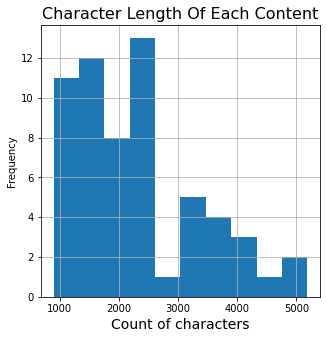

In [98]:
# Lets plot the histogram for character length  of  content
plt.rcParams['figure.figsize']=(5,5)
news_dataframe['char_len_of_article'].plot(kind='hist',bins=10)
plt.grid()
plt.title("Character Length Of Each Content",fontsize=16)
plt.xlabel("Count of characters",fontsize=14)
plt.show()

##  Plotting Histogram for Average word length of each sentence





In [99]:
# Defining a method to plot Average word length of each sentence
def plot_average_word_length_of_each_sentence(column,title,xlabel):
# Splitting and storing each word in a list and then Calculating the char length of each word in a sentence then averaging the char length across each sentence
  plt.rcParams['figure.figsize']=(4,4)
  news_dataframe[column].str.split().\
     apply(lambda x : [len(i) for i in x]). \
    map(lambda x: np.mean(x)).hist()
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel("Frequency")
  plt.show()

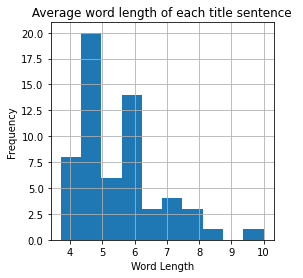

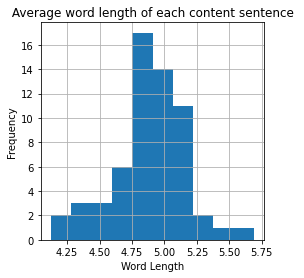

In [100]:
# Plotting for both the title and the content
#plt.subplot(221)
column_t='title'
title_t =" Average word length of each title sentence "
xlabel_t = "Word Length"
plot_average_word_length_of_each_sentence(column_t,title_t,xlabel_t)
#plt.subplot(222)
column_c='content'
title_c =" Average word length of each content sentence "
xlabel_c = "Word Length"
plot_average_word_length_of_each_sentence(column_c,title_c,xlabel_c)


## Plots with respect to StopWords and NonStopWords

In [101]:
# Lets download the stopwords and create a set of those english stop words
nltk.download('stopwords')
stop=set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Calculating Top Stopwords 

In [102]:
#Lets create a corpus and count the occurance of each stop words in the content and see the top 10 stop words
corpus=[]
# Splitting the  sentences into words
news_word= news_dataframe['content'].str.split() 
news_word_to_list=news_word.values.tolist()
counter_stopwords=0
# Creating a corpus and to dict if its a stopword and also count the number of stop words
corpus=[word for i in news_word_to_list for word in i] 
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        counter_stopwords = counter_stopwords + 1
        dic[word]+=1
# Calculating the top 10 stop words
top_10=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
print(f" The top 10 stop words in the content are : {top_10}")
corpuswords=[word  for word in corpus  if word.isalnum()]
d={'Stopwords':counter_stopwords,'NonStopwords':(len(corpus)-counter_stopwords)}



 The top 10 stop words in the content are : [('the', 1272), ('to', 668), ('of', 566), ('and', 483), ('in', 468), ('a', 425), ('is', 236), ('that', 217), ('on', 210), ('for', 196)]


### Pie Chart of StopWords vs NonStopWords

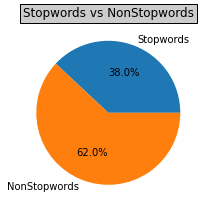

In [103]:
# Lets visualize the number of stop words and non stop words through pie chart
fig = plt.figure(figsize=(5,3))
ax = fig.add_axes((0,0,.5,1))
# Adding title
ax.set_title('Stopwords vs NonStopwords', 
bbox={'facecolor':'0.8', 'pad':3})
# Plotting the pie Chart
plt.rcParams['figure.figsize']=(10,10)
plt.pie(d.values(), labels=d.keys(),autopct='%1.1f%%')
plt.show()


### Barplot fot Top 10 StopWords

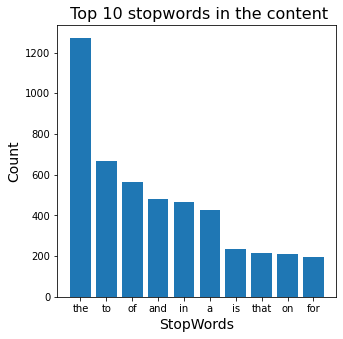

In [104]:
#Lets visualize top 10 occuring stop words in the content
plt.rcParams['figure.figsize']=(5,5)
x,y=zip(*top_10)
plt.title(" Top 10 stopwords in the content",fontsize= 16)
plt.xlabel("StopWords",fontsize = 14)
plt.ylabel("Count",fontsize=14)
plt.bar(x,y)
plt.show()

### Barplot on Top Non Stop Alphanumerical Words

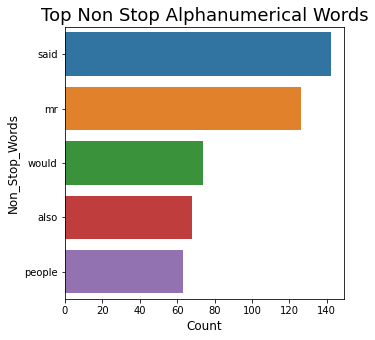

In [105]:
# Lets plot the barplot of the alphanumerical non stop words 
corpus = [token.lower() for token in corpus]
counter=Counter(corpus)
most=counter.most_common()
plt.rcParams['figure.figsize']=(5,5)
x, y= [], []
# Counting the alphanumerical non stop words 
for word,count in most[:40]:
    if (word not in stop and word.isalnum()):
        x.append(word)
        y.append(count)
 # Creating the barplot
b=sns.barplot(x=y,y=x)
b.axes.set_title('Top Non Stop Alphanumerical Words',fontsize=18)
plt.xlabel('Count',fontsize=12) 
plt.ylabel('Non_Stop_Words',fontsize=12)

plt.show()

# **Creating A Text Summarization Method**

In this section I created a text summarization method based on Extractive Summarization technique
The following functions are created to achieve the summarization task
*   text_clean()  : This function is used to clean the text sentence given
*  sentence_similarity_cosine()  : This function uses cosine similarity to find similarity between sentences
*  similarity_matrix_construction() : This functionconstructs similarity matrix using the sentence_similarity_cosine() function defined earlier 
*  generate_summary() : This function takes the dataset and calls the other methods and returns the summerized content of the dataset





## Text Cleaning 

In [106]:
# Creating a text_clean method to clean the text
def text_clean(text):
    paragraph= text.split(". ")
    sentences = []
  
    for sentence in paragraph:
        sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
    sentences.pop() 
    return sentences


## Sentence Similarity Based On Cosine

In [107]:
# Constructing the method to calculate cosine similarity between the two sentences
def sentence_similarity_cosine(sentence1, sentence2, stopwords=None):
    if stopwords is None:
        stopwords = []
 
    sentence1 = [word.lower() for word in sentence1]
    sentence2 = [word.lower() for word in sentence2]
 
    all_words_list = list(set(sentence1 + sentence2))
 
    vector1 = [0] * len(all_words_list)
    vector2 = [0] * len(all_words_list)
 
    # build the vector for the first sentence
    for word in sentence1:
        if word in stopwords:
            continue
        vector1[all_words_list.index(word)] += 1
 
    # build the vector for the second sentence
    for word in sentence2:
        if word in stopwords:
            continue
        vector2[all_words_list.index(word)] += 1
 
    return 1 - cosine_distance(vector1, vector2)
 




## Similarity Matrix

In [108]:
# Constructing similarity matrix using the sentence_similarity_cosine() function defined earlier
def similarity_matrix_construction(sentences, stop_words):
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
 
    for index1 in range(len(sentences)):
        for index2 in range(len(sentences)):
            if index1 == index2: #ignore if both are same sentences
                continue 
            similarity_matrix[index1][index2] = sentence_similarity_cosine(sentences[index1], sentences[index2], stop_words)

    return similarity_matrix

## Generate Summary Method

In [109]:
# Calls the required functions and creates the summary
def generate_summary(dataset, top_n=5):
    stop_words = stopwords.words('english')
    summarize_text = []

    # Step 1 - Read text anc split it
    sentences =  text_clean(dataset)

    # Step 2 - Generate Similary Martix across sentences
    sentence_similarity_martix = similarity_matrix_construction(sentences, stop_words)

    # Step 3 - Rank sentences in similarity martix
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
    scores = nx.pagerank(sentence_similarity_graph)

    # Step 4 - Sort the rank and pick top sentences
    ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    
   # print("Indexes of top ranked_sentence order are ", ranked_sentence)    

    for i in range(top_n):
      summarize_text.append(" ".join(ranked_sentence[i][1]))
     
   
    return summarize_text


## Creating Summary For Random Row

In [110]:
# Randomly generate the row and send it to the generate_summary method
ind = np.random.randint(0,len(news_dataframe),size=1)
i=int(ind)
text=news_dataframe.content.iloc[i]
print(text)
result=generate_summary(text)

 Apple has expanded its iPod family with the release of its next generation of the digital music players.  Its latest challenges to the growing digital music gadget market include an iPod mini model which can hold 6GB compared to a previous 4GB. The company, which hopes to keep its dominant place in the digital music market, also said the gold coloured version of the mini would be dropped. A 30GB version has also been added to the iPod Photo family. The latest models have a longer battery life and their prices have been cut by an average of £40. The original iPod took an early lead in the digital music player market thanks to its large storage capacity and simple design.  During 2004 about 25 million portable players were sold, 10 million of which were Apple iPods. But analysts agree that the success is also down to its integration with the iTunes online store, which has given the company a 70% share of the legal download music market. Mike McGuire, a research director at analyst Gartn

## Creating Summary For All the Rows

In [111]:
# Lets create a summary for every row and content column
def summary_content(dataset):
  ls=list()
#  Iterate over the dataset and call the summary method and add the data obtained to a list 
  for i in range(len(dataset)):  
    text=generate_summary(dataset.content.iloc[i])
    ls.append(text)
  df_summary=pd.DataFrame(ls)
  df_summary['Summary'] = df_summary[df_summary.columns[0:]].apply(   
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)
  df_summary=df_summary['Summary']
  return df_summary
 

In [112]:
# Calling the summary_content method 
df_summary=summary_content(news_dataframe)


In [113]:
# Lets take an example and see the difference of length
print(f"The original length of content :{len(news_dataframe.content.iloc[2])} \n The length of content after summary method : {len(df_summary[2])}")

The original length of content :2252 
 The length of content after summary method : 509


# **DATA PREPROCESSING STEP**
 This are the following  preprocessing steps done on the dataset before featurization .These steps ensures that the content and the title attributes are cleaned and ready for next step of datapreparation pipeline 

1.    **Removing the html tag :**  The news content article might contain html tags since this does not add any context or information for the clustering these are removed.
2.    **Removing the URL :**The links present in the article does not provide much information or context for the clustering algorithm so these are removed too.
1.   **Decontracting the words:** The news articles contains contracted words,therefore converting contractions into their natural form will bring more insights. 
2.    **Removing the punctuations or set of special characters :** Punctuations or special characters does not add to much value to the clustering so these are removed before featurization 
1.    **Check wether made up of english letters and its not alpha-numeric : ** Since they dont add much value they have been removed
2.    **Check length of word is greater than 2**: A single character or word with two characters are removed since they are too small to add any value
1. **Convert to Lower Case :**Since capitalization doesn't change the context or meaning they have been converted to lower case before proceeding to the other steps
2.    **Removing the Stopwords :** Since the other non stop words present in the dataset are more important and give the general idea of the text ,so these stop words are removed 
1.   **Stemming :** Stemming is one of the normalization technique used in NLP that reduces the number of computations required. Here I have used Snowball Stemmer since it is a better version of the Porter Stemmer 










  





In [114]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
sno = nltk.stem.SnowballStemmer('english')

## Removing HTML Tag

In [115]:
# Fuction to remove html tag
def removehtml(sentence):
  cleanr=re.compile('<.*?>')
  cleantext = re.sub(cleanr,' ',sentence)
  return cleantext


## Removing URL Tag

In [116]:
# Fuction to remove URL tag
def removeurl(sentence):
   return re.sub(r"http\S+", "", sentence)

## Expanding Contracted Words

In [117]:
# Fuction to expand the contracted words
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

## Removing Puncuation and Special Character

In [118]:
# Function to remove punctuation and special character
def removepunc(sentence):
  cleaned = re.sub(r'[?|!|\'|"|#|*]',r' ',sentence)
  cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
  return cleaned

## Preprocessing Method

In [119]:
# Function that calls other methods are returns the cleaned data
def preprocessing_eda(dataset,column):
  i=0
  str1=' '
  final_string=list()
  s=' '
  for sent in dataset[column].values:
    filtered_sentence=list()
    #  Removing url,hrml and expanding the contracted words
    sent=removehtml(sent)
    sent=removeurl(sent)
    sent=decontracted(sent)
    for w in sent.split():
    # Removing punctuation stop words and words with length less than 2 and also adding the words which contains all alpha characters
      for cleaned_words in removepunc(w).split():
        if((cleaned_words.isalpha()) and (len(cleaned_words)>2)):
          if(cleaned_words.lower() not in stop):
    # Using snowball stemmer which is an better version of Porter Stemmer
            s=(sno.stem(cleaned_words.lower())).encode('utf8')
            filtered_sentence.append(s)
          else:
            continue
        else:
          continue
    str1= b" ".join(filtered_sentence)
    str1 = str1.decode('UTF-8')  
    final_string.append(str1)
    i=i+1
  return final_string


## Preprocessing Content and Title Columns

In [120]:
# Calling the processing_eda method for content and title column
column='content'
new_string = preprocessing_eda(news_dataframe,column)
news_dataframe['CleanedText'] = new_string
column='title'
new_string1=preprocessing_eda(news_dataframe,column)
news_dataframe['CleanedTitle']=new_string1


In [121]:
# Observing the news dataframe after data cleaning 
news_dataframe.head(2)

,title,content,char_len_of_article,CleanedText,CleanedTitle
0,Davenport hits out at Wimbledon,World number one Lindsay Davenport has critic...,1405,world number one lindsay davenport criticis wi...,davenport hit wimbledon
1,Camera phones are 'must-haves',Four times more mobiles with cameras in them ...,3550,four time mobil camera sold europ end last yea...,camera phone


# **Featurization Of The Text Data**
In this I will try various featurization techniques like tf-idf,bag of words and word2vec and so on and convert the text data into numerical matrices 
In this section I will implement the following
*   tf-idf
*   bags_of_words
*   Customized Word2vec






## Implementing tf-idf

In [122]:
# Creating a function to vectorize strings and perform tf-idf transformation
# This takes the cleaned document as arguments and returns the vectorized matrices

def tf_idf_vectorize_texts(strings):
    print('Performing vectorization and TF/IDF transformation ....')
    count_vect = CountVectorizer() 
    X = count_vect.fit_transform(strings)  
    transformer = TfidfTransformer(smooth_idf=False)
    tfidf = transformer.fit_transform(X)
    return tfidf

## Implementing Bag Of Words

In [123]:
# Creating a function to implement BOW (this takes the cleaned document as arguments and returns the vectorized matrices)
def bag_of_words_vectorize_texts(strings):
  count_vect = CountVectorizer() 
  count_vect.fit(strings)
  print('Performing vectorization and BOW transformation ....')
  final_counts = count_vect.transform(strings)
  print("the type of count vectorizer ",type(final_counts))
  return final_counts

## Implementing Word2vec featurization

### Creating Filtered Sentences

In [124]:
# Creating a list of filtered sentences which will be later used to train the w2v model 
# I am only considering the content attribute of the original dataframe has it has more data compared to the title attribute
import gensim
i=0
list_of_sent=[]
for sent in  news_dataframe['content'].values:
  filtered_sentence=[]
  sent=removehtml(sent)
  for w in sent.split():
    for cleaned_words in removepunc(w).split():
      if(cleaned_words.isalpha()):
        filtered_sentence.append(cleaned_words.lower())
      else:
        continue
  list_of_sent.append(filtered_sentence)  
  


### Creating Word2Vec Model 

In [125]:
# Creating the w2v model using the list of sentences created above here the min count has been set to 5
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,size=50,workers=4)

### Vocabolary Of The Model

In [126]:
# Checking the vocabolary of the created model 
words=list(w2v_model.wv.vocab)
print(len(words))

761


### Creating Vectorize Method

In [127]:
# creating the vectorize method which takes two input model and the documents as input and creates and generates a feature vector per document as output
def vectorize(list_of_docs, model):

    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features


### Creating Vectorized Documents

In [128]:
# Creating Vectorized documents by calling the vectorize method defined above
vectorized_docs = vectorize(news_dataframe['CleanedText'], model=w2v_model)
len(vectorized_docs), len(vectorized_docs[0])

(60, 50)

# Creating Customised Kmeans

In [129]:
# Defining a method which returns the fitted k-means model
kmeans3_df = pd.DataFrame()
def cluster_texts(num_clusters, data):
    #perform kmeans clustering for range of clusters
    print("=="*50)
    print('Beginning KMeans Clustering, number of clusters = ', num_clusters, '\n') 
    km = KMeans(n_clusters=num_clusters, max_iter = 100, verbose = 2, n_init = 1).fit(data)
    print(f" The silhouette metric score is :{metrics.silhouette_score(data, km.labels_, metric='euclidean')}")
    

    print("=="*50)
    
    
    return km

#Finding the value of K IN K-Means


## Using silhouette metrics to find the value of k

In [130]:
# Running a for loop from 3 to 14 to find the optimal number for k
# After running we can observe silhouette metric score is highest for 3 .
# Higher Silhouette Coefficient score relates to a model with better defined clusters
for i in range(3,15):
  cluster_texts(i,vectorized_docs)

Beginning KMeans Clustering, number of clusters =  3 

Initialization complete
Iteration 0, inertia 0.210516297692847
Iteration 1, inertia 0.1423737380762543
Iteration 2, inertia 0.12703167212181687
Iteration 3, inertia 0.11091682969731645
Iteration 4, inertia 0.10746670336144018
Iteration 5, inertia 0.10542092448341517
Iteration 6, inertia 0.10512537624253818
Converged at iteration 6: strict convergence.
 The silhouette metric score is :0.5458478927612305
Beginning KMeans Clustering, number of clusters =  4 

Initialization complete
Iteration 0, inertia 0.10503045930517524
Iteration 1, inertia 0.08137778926632973
Iteration 2, inertia 0.07758884989966397
Iteration 3, inertia 0.07467587115791041
Iteration 4, inertia 0.07358198447146158
Iteration 5, inertia 0.07329255118756489
Iteration 6, inertia 0.07272696860691742
Iteration 7, inertia 0.07204539915778287
Converged at iteration 7: strict convergence.
 The silhouette metric score is :0.5428587794303894
Beginning KMeans Clustering, numbe

## Using Elbow Method to find the value of K

In [131]:
# Iterating over wide range of k values to find the optimal k value the kmeans is fitted on the vectorized document.
#The vectorized documents  is obtained by passing the cleaned content value to word2vec 
# Appending the intertia of kmeans which will be later used in the plot 
inertia = list()
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(vectorized_docs)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:968: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  RuntimeWarning,


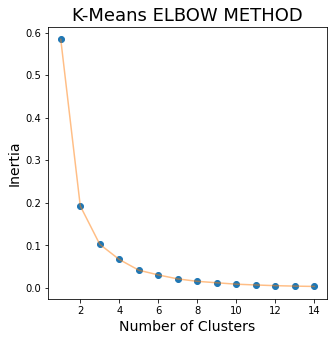

In [132]:
# Plotting the elbow curve to obtain the k value
# We can observe that the k value is at 3 since it bends like elbow at position 3 and this is also verified by the silhouette metric score
plt.figure(1 , figsize = (5 ,5))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters',fontsize=14) , plt.ylabel('Inertia',fontsize=14)
plt.title("K-Means ELBOW METHOD",fontsize=18)
plt.show()

## Observations
The following observations were made :

*   The optimal value of k was found to be at 3 by both silhouette metrics score and kmeans ELBOW Method.
*   After running we can observe silhouette metric score is highest for 3 , higher Silhouette Coefficient score relates to a model with better defined clusters.

*   In the ELBOW Method above we can observe that the curve bends at 3






#Experimentations
*   First Experimentation - Kmeans on featurized Cleaned Text(Tf-idf)
*   Second Experimentation- Kmeans on featurized Cleaned Title(Tf-idf)
*   Third Experimentation - Kmeans on both featurized Cleaned Text and Title(Tf-idf)
*   Fourth Experimentation - Kmeans on featurized Cleaned Text(BOW)

*   Fifth Experimentation - Kmeans on featurized Cleaned Text but using randomised Centroid (Tf-idf)
*   Sixth Experimentation - Kmeans model on summaraised Text ( Word2Vec used for featurization)
*   Seventh Experimentation - Kmeans model on Cleaned Text (  Word2Vec used for featurization)
*   Eighth Experimentation - KMedoids model on Cleaned Text(Word2Vec used for featurization)







##Experiment 1 - Kmeans on featurized Cleaned Text(Tf-idf)

### Vectorizing on Cleaned Text and Building the model

In [133]:
#vectorized the CleanedText
data_text=news_dataframe['CleanedText']
documents_vectorized_text = tf_idf_vectorize_texts(data_text)
#Lets see the shape of the vectorized Cleaned Text
print(f"The shape of the document after vectorization and tf-idf transformation is : {documents_vectorized_text.shape}")
#Running kmeans model on vectorized content
kmeans3_content = cluster_texts(3, documents_vectorized_text)

Performing vectorization and TF/IDF transformation ....
The shape of the document after vectorization and tf-idf transformation is : (60, 3210)
Beginning KMeans Clustering, number of clusters =  3 

Initialization complete
Iteration 0, inertia 104.40848476381828
Iteration 1, inertia 53.96088789429338
Converged at iteration 1: strict convergence.
 The silhouette metric score is :0.009771747658195095


### Distribution of Labels

In [134]:
# Lets see the labels distribution
kmeans3_df['Labels_On_Content']=(kmeans3_content.labels_)
kmeans3_df['Labels_On_Content'].value_counts()

2    29
1    21
0    10
Name: Labels_On_Content, dtype: int64

## Experiment 2 - Kmeans on featurized Cleaned Title(Tf-idf)

### Vectorizing on Cleaned Title and Building the model

In [135]:
#Vectorizing the CleanedTitle
data_title=news_dataframe['CleanedTitle']
documents_vectorized_title = tf_idf_vectorize_texts(data_title)
#Lets see the shape of the vectorized Cleaned Text
documents_vectorized_title.shape
#Running kmeans model on vectorized title
kmeans3_title= cluster_texts(3,documents_vectorized_title)

Performing vectorization and TF/IDF transformation ....
Beginning KMeans Clustering, number of clusters =  3 

Initialization complete
Iteration 0, inertia 112.1257698677858
Iteration 1, inertia 56.490150877272235
Converged at iteration 1: strict convergence.
 The silhouette metric score is :0.004173144730166677


### Distribution of Labels

In [136]:
# Lets see the labels distribution
kmeans3_df['Labels_On_Title']=(kmeans3_title.labels_)
kmeans3_df['Labels_On_Title'].value_counts()

1    51
0     6
2     3
Name: Labels_On_Title, dtype: int64

## Experiment 3 - Kmeans on both featurized Cleaned Text and Title(Tf-idf)

###  Vectorizing on both the Columns and Building the model

In [137]:
# Since it takes two column different approach is used to obtain featurized vector
from sklearn.compose import make_column_transformer
features=news_dataframe.iloc[:,[-2,-1]]
vectorizer = TfidfVectorizer(lowercase=False)
# Using the make column transformer method to transform both the column simultaneously
transformer = make_column_transformer((vectorizer, 'CleanedText'), (vectorizer, 'CleanedTitle'))
features = transformer.fit_transform(features)
# Lets check the shape of the featurized vector
print(f" The shape of the document after vectorization and tf-idf transformation is :{features.shape}")
# Running kmeans model on Combined Features 
kmeans3_combined = cluster_texts(3, features)


 The shape of the document after vectorization and tf-idf transformation is :(60, 3435)
Beginning KMeans Clustering, number of clusters =  3 

Initialization complete
Iteration 0, inertia 217.12751059830435
Iteration 1, inertia 110.73966744301538
Converged at iteration 1: strict convergence.
 The silhouette metric score is :0.002745560675992559


### Distribution of Labels

In [138]:
# Lets see the labels distribution
kmeans3_df['Labels_On_Combined']=(kmeans3_combined.labels_)
kmeans3_df['Labels_On_Combined'].value_counts()

2    27
1    21
0    12
Name: Labels_On_Combined, dtype: int64

## Experiment 4 - Kmeans on featurized Cleaned Text(BOW)


### Vectorizing based on Bag Of Words and Building a Model

In [139]:
# Vectorizing the CleanedText
vectorized_text = bag_of_words_vectorize_texts(news_dataframe['CleanedText'])
#Lets see the shape of the vectorized Cleaned Text
print(f"The shape of the document after vectorization and tf-idf transformation is : {vectorized_text.shape}")
kmeans3_BOW_cleanedtext = cluster_texts(3, vectorized_text)

Performing vectorization and BOW transformation ....
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
The shape of the document after vectorization and tf-idf transformation is : (60, 3210)
Beginning KMeans Clustering, number of clusters =  3 

Initialization complete
Iteration 0, inertia 37090.0
Iteration 1, inertia 25500.827586206873
Converged at iteration 1: strict convergence.
 The silhouette metric score is :0.19424596857677445


### Distribution of Labels

In [140]:
# Lets see the labels distribution
kmeans3_df['LabelsBOW_cleanedtext']=(kmeans3_BOW_cleanedtext.labels_)
kmeans3_df['LabelsBOW_cleanedtext'].value_counts()

0    58
1     1
2     1
Name: LabelsBOW_cleanedtext, dtype: int64

## Experiment 5 - Kmeans on featurized Cleaned Text but using randomised Centroid (Tf-idf)

### Building Customized Kmeans

In [141]:
def random_centroid(num_clusters, data):
    #perform kmeans clustering for range of clusters
    print("=="*50)
    print('Beginning KMeans Clustering, number of clusters = ', num_clusters, '\n') 
    km = KMeans(n_clusters=num_clusters, max_iter = 100, verbose = 2,init='random', n_init = 3).fit(data)
    print(f" The silhouette metric score is :{metrics.silhouette_score(data, km.labels_, metric='euclidean')}")
    print("=="*50)
    
    
    return km

### Vectorizing Clean Text 

In [142]:
#vectorized the CleanedText
data_text=news_dataframe['CleanedText']
documents_vectorized_text = tf_idf_vectorize_texts(data_text)
#Lets see the shape of the vectorized Cleaned Text
print(f"The shape of the document after vectorization and tf-idf transformation is : {documents_vectorized_text.shape}")
#Running kmeans random centroid model on vectorized content
kmeans3_RI_Cleanedtext = random_centroid(3, vectorized_text)

Performing vectorization and TF/IDF transformation ....
The shape of the document after vectorization and tf-idf transformation is : (60, 3210)
Beginning KMeans Clustering, number of clusters =  3 

Initialization complete
Iteration 0, inertia 46370.0
Iteration 1, inertia 26079.728070175443
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 42417.0
Iteration 1, inertia 26318.327586206873
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 37240.0
Iteration 1, inertia 26443.551724137902
Converged at iteration 1: strict convergence.
 The silhouette metric score is :0.05314343647393543


### Distribution of Labels

In [143]:
# Lets see the labels distribution
kmeans3_df['RI_cleanedtext']=(kmeans3_RI_Cleanedtext.labels_)
kmeans3_df['RI_cleanedtext'].value_counts()

2    57
1     2
0     1
Name: RI_cleanedtext, dtype: int64

## Experimentation 6 - Kmeans model on summaraised Text ( Word2Vec used for featurization)

### Creating A Vectorized Summerized Text and Building A Model

In [144]:
# Creating a summary data Frame
df1=pd.DataFrame()
df1['Summary_Content']= df_summary
# Lets clean the data using the preprocessing_eda method
column='Summary_Content'
new_string = preprocessing_eda(df1,column)
df1['Cleaned_Summary_Content'] = new_string
# Lets apply the vectorization on cleaned summerized text
vectorized_docs1= vectorize(df1['Cleaned_Summary_Content'], model=w2v_model)
len(vectorized_docs1), len(vectorized_docs1[0])
# Running kmeans model on Summarised Content data 
kmeans3_summary_cleanedtext = cluster_texts(3, vectorized_docs1)

Beginning KMeans Clustering, number of clusters =  3 

Initialization complete
Iteration 0, inertia 0.4558809987530062
Iteration 1, inertia 0.3882918614569252
Iteration 2, inertia 0.38650863563834714
Iteration 3, inertia 0.3854896420567949
Converged at iteration 3: strict convergence.
 The silhouette metric score is :0.4698376953601837


##Experiment 7 - Kmeans model on Cleaned Text (  Word2Vec used for featurization)


### Building the  Model 

In [145]:
#Running kmeans random centroid model on vectorized content
kmeans3_Best_Model = cluster_texts(3, vectorized_docs)

Beginning KMeans Clustering, number of clusters =  3 

Initialization complete
Iteration 0, inertia 0.1755664596946545
Iteration 1, inertia 0.10418759518582515
Iteration 2, inertia 0.10248027929022274
Converged at iteration 2: strict convergence.
 The silhouette metric score is :0.595798134803772


###   Distribution of Labels

In [146]:
# Lets see the labels distribution
kmeans3_df['Best_Model']=(kmeans3_Best_Model.labels_)
kmeans3_df['Best_Model'].value_counts()

2    31
1    22
0     7
Name: Best_Model, dtype: int64

## Experiment 8 - KMedoids model on Cleaned Text(Word2Vec used for featurization)

### Building the KMedoids Model

In [147]:
# Building the model and using an evaluation metrics
kmed = KMedoids(n_clusters=3, random_state=0).fit(vectorized_docs)
print(f" The silhouette metric score is :{metrics.silhouette_score(vectorized_docs, kmed.labels_, metric='euclidean')}")

 The silhouette metric score is :0.5206353664398193


### Distribution of Labels

In [148]:
# Lets see the labels distribution
kmeans3_df['KMedoids_Model']=(kmed.labels_)
kmeans3_df['KMedoids_Model'].value_counts()

2    22
0    21
1    17
Name: KMedoids_Model, dtype: int64

## Visualisation of Some Experiments

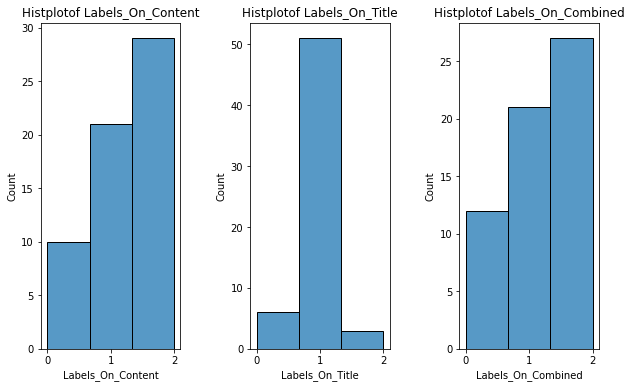

In [149]:
# Plotting histplot for various customised Labels
plt.figure(1 , figsize = (10 , 6))
n = 0 
for x in ['Labels_On_Content' , 'Labels_On_Title' , 'Labels_On_Combined']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(kmeans3_df[x] , bins = 3)
    plt.title('Histplotof {}'.format(x))
plt.show()

## Observations

*   Carried out a wide range of experimentation firstly to find the value of k and the optimal value was found to be 3

*   The Experimentation that I carried out used different Featurization techniques like tf-idf,word2vec,BOW and so on but it was found that the kmeans model performed much better with word2vec.
*  The attribute Cleaned Title which is obtained from the Content attribute was found to be the one giving the best results as compared to the title and the combination of title and content.
*  Also carried out the experimentation with the cleaned summary .attribute which was featurized by word2vec however the silhouette score of it was bit lower than the corresponding best model(Experiment 7)
*   Kmedoids clustering was also tried in the last experimentation I wanted to try Kmediods since this algorithm is more robust to outliers and noise as compared to K-Means algorithm.








# Conclusion and Further Enhancements
 The task of this project was to cluster different news articles which was carried out in several steps begining from the data analysing to visualization steps then to data preparation model building and evaluation and finally the Experimentation 7 was found to be better compared to other experiments carried out.
 These are the further enhancements which can be carried out the first one being the google word2vec would be used as compared to the user defined one second one being the labels generated could be added to the original dataframe and various ml models can be built on them so when an article is given it can classify the article . This would only be feasible if the rows in the original dataframe are increased by collecting more articles  